In [ ]:
NOMBRES: DANIELA FABREGA, FELIPE SALDIAS, NICOLAS OTAROLA

# SIMULACIÓN | LABORATORIO 1


### CONTENIDOS
1. Ejemplo del lanzamiento de monedas
2. Conceptos: Espacio muestral, evento, probabilidad
3. Principios de probabilidad 


### ¿Cómo asignamos valores de probabilidad?

- $\textbf{Enfoque frecuentista relativo o de simulación:}$ Sea $n$ el número de experimentos, y $n(A)$ el número de veces que el evento $A$ ocurre en la realización de esos experimentos, entonces $P(A) = \frac{n(A)}{n}$

- $\textbf{Enfoque frecuentista clásico:}$ Sea $n(A)$ el número elementos en el evento $A$, y $n(\Omega)$ el número de elementos en el espacio muestral $\Omega$, entonce $P(A) = \frac{n(A)}{n(\Omega)}$

- $\textbf{Enfoque Bayesiano:}$ Yo pienso que la probabilidad de que me gane un proyecto es $0.9$ (probabilidad a priori).

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Lanzamiento de monedas

In [412]:
# Define algunos parámetros del contexto de trabajo
sns.set_context("notebook", 
                font_scale=1.5, 
                rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')
# Crea dic variables de color que serán usadas en este contexto
rojo= sns.xkcd_rgb['vermillion']
azul= sns.xkcd_rgb['dark sky blue']


In [413]:
#utilzaremos la distribución binomial para modelar el experimento del lanzamiento de una moneda n veces
def factorial(n):
    """Calcula factorial de `n`
    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calcula la combinatoria de n y k 
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Retorna la probabilidad de que ocurran `k` caras in `n` lanzamientos de una moneda
    
    Argumentos:
    
    n - número de ensayos
    k - número de ensayos en los que se obtiene cara
    p - probabilidad de que el evento "obtener cara" ocurra
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

def lanzaMoneda(N_caras, N_exper): 
    # Calcula la probabilidad de cada posible salida (N_caras) 
    # del experimento de lanzar N_exper veces una moneda equilibrada
    probabilidades = [binom_prob(N_exper, k, 0.5) for k in range(1, N_exper + 1)]
    #p_value es la probabilidad de que la salida sea mayor o igual que N_caras
    p_value = (np.sum(probabilidades[N_caras-1:]))
    # Grafica la distribución de probabilidad calculada
    plt.step(range(1, N_exper + 1), probabilidades, where='mid', color=azul)
    plt.xlabel('número de caras')
    plt.ylabel('probabilidad')
    plt.plot((N_caras, N_caras), (0, max(probabilidades)), color=rojo)
    
    porc = round((p_value)*100,3)
    plt.annotate( str(porc) + '%', 
                 xytext=(N_caras + 10, max(probabilidades)/2), 
                 xy=(N_caras, max(probabilidades)/2), 
                 multialignment='right',
                 va='center',
                 color=rojo,
#                  size='large',
                 arrowprops={'arrowstyle': '<|-', 
                             'lw': 1, 
                             'color': rojo, 
                             'shrinkA': 1})
    return p_value

0.5561375863296085

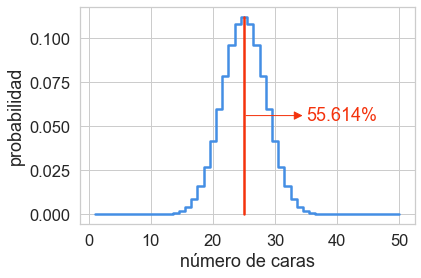

In [414]:
lanzaMoneda(25,50)


P-value simulado: 51.1%


0.5126125090891804

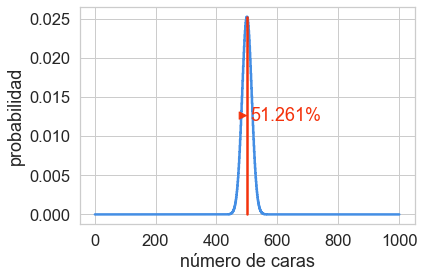

In [415]:
#Simularemos directamente el lanzamiento de la moneda considerando # valores aleatorios para el resultado de cada lanzamiento
M = 0
n = 1000  # cambie este valor.
N_caras = 500
N_exper = 1000
for i in range(n):
    #genera N_exper valores aleatorios 0 o 1
    ensayos = np.random.randint(2, size=N_exper)
    if (ensayos.sum() >= N_caras):
        M += 1
p = M / n

print("P-value simulado: %0.1f%%" % (p * 100))
lanzaMoneda(N_caras,N_exper)

### Preguntas 
1. Utilice distintos valores para N_caras y N_exper ¿Qué es el valor "p" en ambos casos?



    R:// p representa las probabilidades de obtener mas de N_caras realizando N_exper lanzamientos de moneda. 
    
    
2. En el código de la simulación, reemplace el valor n ¿Desde qué cantidad la simulación reemplaza el análisis estadístico? Grafique


  R:// dependiendo del numero de monedas que se lancen, eso igual ayudara a disminuir el ruido en los resultados, nosotros intentamos hacerlo con una gran cantidad de monedas 1000 y buscar sobre 500 caras para tratar de eliminar ese factor y centrarnos solamente en estudiar la influencia de la variacion del n sobre la probabilidad obtenida, obviamente nunca será lo mismo que la probabilidad teorica, pero sobre un n de 500 se obtienen resultados bastante interesantes 

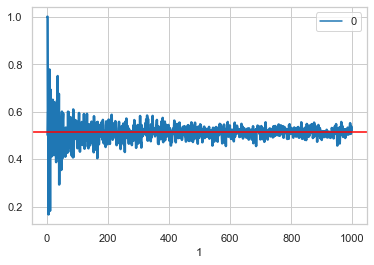

In [425]:
#Simularemos directamente el lanzamiento de la moneda considerando # valores aleatorios para el resultado de cada lanzamiento

rep = 10 
n = 1000  # cambie este valor.
N_caras = 500
N_exper = 1000
resultados = []

for j in range(1, n):
    M = 0
    for i in range(j):
        #genera N_exper valores aleatorios 0 o 1
        ensayos = np.random.randint(2, size=N_exper)
        if (ensayos.sum() >= N_caras):
            M += 1
    p = M / j
    resultados.append([p,j])
    #print("P-value simulado: %0.1f%%" % (p * 100))
p_teorico = lanzaMoneda(N_caras,N_exper)

sns.set_theme(style="whitegrid")
plt.clf()
df=pd.DataFrame(resultados)
#data = pd.DataFrame(df[0], df[1])

a= sns.lineplot(data=pd.DataFrame(df[0], df[1]), palette="tab10", linewidth=2.5)
a.axhline(p_teorico, color="red")


## Ejercicio 
En un certamen literario hay 3 premios: ganador, finalista y mención honrosa. Si participan 10 personas en el certamen, se puede definir, el espacio muestral de los posibles resultados como:

${S = \{ \text{todas las formas de ordenar } (1,2,3,4,5,6,7,8,9,10) \}}$

En donde los números identifican a cada una de las 10 personas y  las primeras tres ubicaciones corresponden a los escritores premiados.

Sea ${A}$ el evento en que la persona #1 obtiene un premio, el evento ${B}$ denota que la persona #2 es finalista, y el evento ${C}$ es quela persona #3 gana la mención honrosa.

Simule e indique la probabilidad de: 

(a) $A \cup B$ 

(b) $A \cap B$

(c) $A \cap B \cap C$

(d) $A \cup (B\cap C)$


puede usar random.shuffle de la biblioteca random para generar permutaciones aleatorias de [1,2,...,10] 

In [529]:
import random

S = np.arange(1,11,1)



def verify(number, position):
    for i in position:
        if number == S[i]: return True
    return False

def run_experiment(times, event, union):
    c=0;
    for i in range(times):
        random.shuffle(S)
        control_array = np.array([False for x in range(event.shape[0])])
        for i, [number, positions] in enumerate(event):
            control_array[i]=verify(number, positions)
            
        if(union):
            if control_array.any():c+=1
        else:
            if control_array.all(): c+=1
          
    probability= c/times    
    return probability
            
     
def run_experiment_4(times, event, success_options):
    c=0;
    for i in range(times):
        random.shuffle(S)
        control_array = np.array([False for x in range(event.shape[0])])
        method_control = np.array([False for x in range(success_options.__len__())])
        
        for i, [number, positions] in enumerate(event):
            control_array[i]=verify(number, positions)   
            
        for i, _or in enumerate(success_options):            
            cache=[]
            for _and in _or:
                cache.append(control_array[_and])
            #print(cache)
            
            method_control[i]= all(cache)
        if any(method_control): c+=1
          
    probability= c/times    
    return probability

In [492]:
A= [1,[0,1,2]]
B= [2,[1]]
C= [3, [3]]

### Ejericio a)

In [436]:


experiment_1 = np.array([A,B], dtype=object)
mean=0
for i in range(1000):
    mean+= run_experiment(100 ,experiment_1, union=True)
    probability = mean/1000
print("la probabilidad obtenida es: "+ str(probability))

la probabilidad obtenida es: 0.3775299999999994


### Ejericio b)


In [437]:

experiment_2 = np.array([A,B], dtype=object)
mean=0
for i in range(1000):
    mean+= run_experiment(100 ,experiment_2, union=False)
    probability = mean/1000
print("la probabilidad obtenida es: "+ str(probability))

la probabilidad obtenida es: 0.022489999999999975


### Ejericio c)


In [439]:

experiment_3 = np.array([A,B,C], dtype=object)
mean=0
for i in range(1000):
    mean+= run_experiment(100 ,experiment_3, union=False)
    probability = mean/1000
print("la probabilidad obtenida es: "+ str(probability))

la probabilidad obtenida es: 0.02199999999999998


### Ejericio d)

In [584]:
experiment_4 = np.array([A,B,C], dtype=object)
mean=0
for i in range(1000):
    mean+= run_experiment_4(100 ,experiment_4, [[0],[1,2]])
    probability = mean/10
print("la probabilidad obtenida es: "+ str(probability))

la probabilidad obtenida es: 30.591000000000086


# Referencias
1. https://github.com/croach/statistics-for-hackers/blob/master/statistics-for-hackers.ipynb
2. Ross, S. M. (2006). Simulation. Elsevier.